# Featching data

In [9]:
# Importing necessary libraries for data fetching, processing, and visualization
import requests  # For API calls
import pandas as pd  # For data manipulation
from datetime import datetime  # For date-time manipulation


# Function to fetch cryptocurrency data from the CoinGecko API
def fetch_crypto_data(coin_id="bitcoin", days=90, currency="usd"):
    """
    Fetches historical market data (price) for a given cryptocurrency from the CoinGecko API.

    Parameters:
    - coin_id: The identifier of the cryptocurrency (e.g., 'bitcoin', 'ethereum').
    - days: Number of days of historical data to fetch.
    - currency: Currency in which the price is quoted (e.g., 'usd', 'eur').

    Returns:
    - df: A DataFrame containing the date ('ds') and price ('y') for the selected cryptocurrency.
    """
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": currency, "days": days}  # Parameters for the API request
    response = requests.get(url, params=params)  # Send the request to the API
    data = response.json()  # Parse the JSON response from the API

    # Extract the price data and convert it into a DataFrame
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["ds"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convert timestamps to datetime format
    df["y"] = df["price"]  # Assign price data to column 'y'
    return df[["ds", "y"]]  # Return a DataFrame with only 'ds' and 'y'


# Fetch data for Bitcoin for the last 90 days
df = fetch_crypto_data("bitcoin", 90)
df.head(10)  # Display the first few rows of the data


,ds,y
0,2025-01-23 08:03:31.927,102601.694514
1,2025-01-23 09:03:51.202,102187.992126
2,2025-01-23 10:03:37.948,101564.384022
3,2025-01-23 11:03:47.028,101524.957807
4,2025-01-23 12:03:48.164,101920.047647
5,2025-01-23 13:03:51.981,101594.672238
6,2025-01-23 14:03:50.951,102542.274631
7,2025-01-23 15:03:46.393,105043.445323
8,2025-01-23 16:03:35.575,105232.583502
9,2025-01-23 17:02:44.470,105174.057934


# Visualizing Historical Data

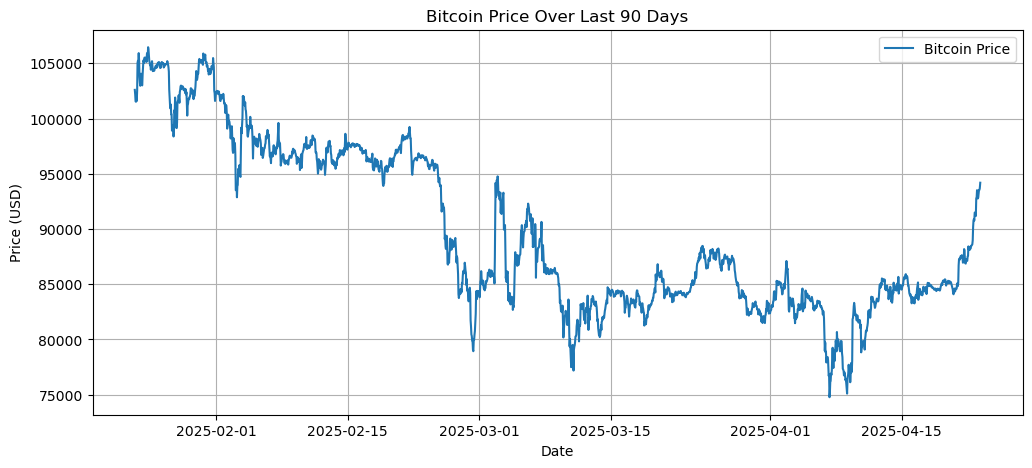

In [2]:
import matplotlib.pyplot as plt

# Plot the historical price of Bitcoin over the last 90 days
plt.figure(figsize=(12, 5))
plt.plot(df["ds"], df["y"], label="Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Last 90 Days")
plt.grid(True)
plt.legend()
plt.show()


# Forecasting with Prophet

In [3]:
from prophet import Prophet

# Ensure that 'ds' column is in datetime format for Prophet
df["ds"] = pd.to_datetime(df["ds"])

# Prepare the data for Prophet by selecting only 'ds' and 'y'
df_prophet = df[["ds", "y"]]  # Prophet requires these column names


# Initialize the Prophet model for time series forecasting
model = Prophet(daily_seasonality=True)  # Enable daily seasonality to capture daily patterns

# Fit the model on the historical data
model.fit(df_prophet)

# Generate future dates for forecasting (next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict future values using the trained model
forecast = model.predict(future)




13:49:11 - cmdstanpy - INFO - Chain [1] start processing
13:49:12 - cmdstanpy - INFO - Chain [1] done processing


# Plotting the Forecast Results

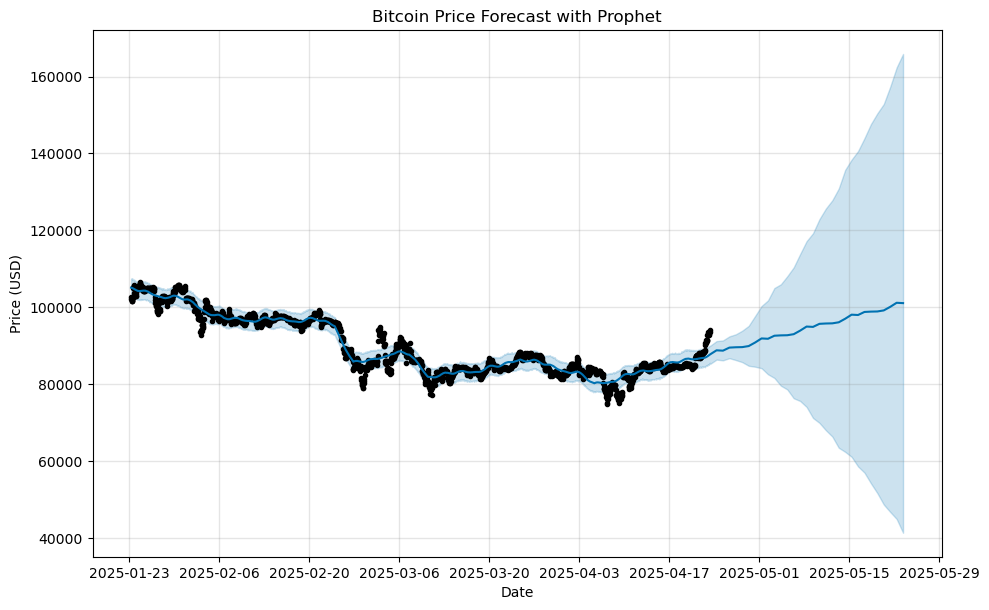

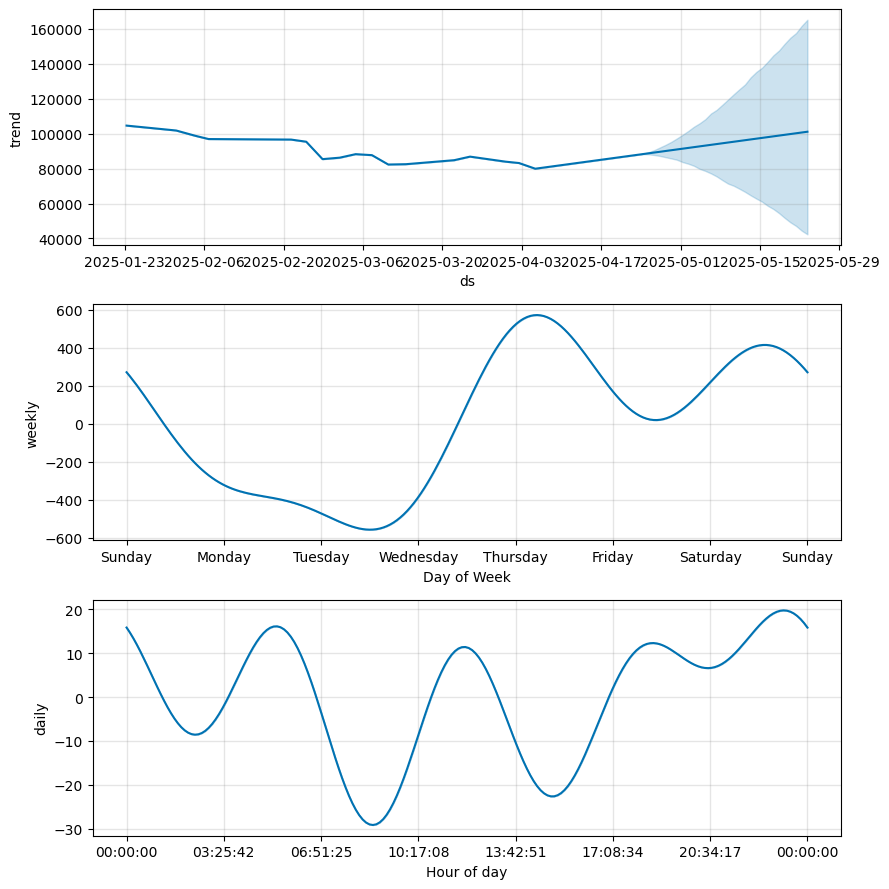

In [4]:
# Plot the forecasted Bitcoin price for the next 30 days
fig = model.plot(forecast)
plt.title("Bitcoin Price Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


# Plot the components of the forecast (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


# Sentiment Analysis of Tweets and Headlines

In [5]:
import nltk
nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer for tweet analysis
sia = SentimentIntensityAnalyzer()

# Example tweets about Bitcoin (in a real-world application, you'd use live data)
tweets = [
    "Bitcoin is booming right now!",
    "The crypto market is crashing again...",
    "BTC to the moon 🚀!",
    "I'm scared of investing in crypto these days.",
    "HODL strong. Bitcoin will recover!"
]

# Analyze sentiment for each tweet
for tweet in tweets:
    sentiment = sia.polarity_scores(tweet)
    print(f"Tweet: {tweet}")
    print(f"Sentiment Score: {sentiment['compound']}\n")

# Example crypto-related news headlines for sentiment analysis
headlines = [
    "Bitcoin price surges to new 6-month high",
    "Crypto market struggles amid regulatory uncertainty",
    "El Salvador increases Bitcoin reserves",
    "Investors are losing confidence in altcoins",
    "Crypto exchange hacked, millions lost in BTC"
]

# Analyze sentiment for each headline and print the sentiment category
for headline in headlines:
    score = sia.polarity_scores(headline)
    print(f"Headline: {headline}")
    print(f"Sentiment Score: {score['compound']} ({'Positive' if score['compound'] > 0 else 'Negative' if score['compound'] < 0 else 'Neutral'})")
    print("-" * 80)



Tweet: Bitcoin is booming right now!
Sentiment Score: 0.0

Tweet: The crypto market is crashing again...
Sentiment Score: 0.0

Tweet: BTC to the moon 🚀!
Sentiment Score: 0.0

Tweet: I'm scared of investing in crypto these days.
Sentiment Score: -0.4404

Tweet: HODL strong. Bitcoin will recover!
Sentiment Score: 0.5562

Headline: Bitcoin price surges to new 6-month high
Sentiment Score: 0.0 (Neutral)
--------------------------------------------------------------------------------
Headline: Crypto market struggles amid regulatory uncertainty
Sentiment Score: -0.5994 (Negative)
--------------------------------------------------------------------------------
Headline: El Salvador increases Bitcoin reserves
Sentiment Score: 0.0 (Neutral)
--------------------------------------------------------------------------------
Headline: Investors are losing confidence in altcoins
Sentiment Score: 0.1779 (Positive)
--------------------------------------------------------------------------------
Headli

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Train-Test Split and Forecasting with Prophet

In [6]:
# Split data into training (75%) and testing (15%) sets
train_df = df[:-15]  # Train data: All but the last 15 days
test_df = df[-15:]   # Test data: Last 15 days

# Initialize Prophet model for forecasting
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# Forecast the next 15 days
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)

# Get the predicted values for the test period
predicted = forecast[-15:][["ds", "yhat"]]


13:49:15 - cmdstanpy - INFO - Chain [1] start processing
13:49:16 - cmdstanpy - INFO - Chain [1] done processing


# Model Evaluation (MAE, RMSE)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values from the test data
actual = test_df["y"].values
predicted_values = predicted["yhat"].values

# Evaluate the model's accuracy using MAE and RMSE
mae = mean_absolute_error(actual, predicted_values)
rmse = np.sqrt(mean_squared_error(actual, predicted_values))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 3361.51
Root Mean Squared Error (RMSE): 3477.43


#  ARIMA Forecasting

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33193.074, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33192.608, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33194.202, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33194.181, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33190.725, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33195.447, Time=0.73 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.980 seconds
MAE: 1997.50
RMSE: 2194.31


C:\Users\Admin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


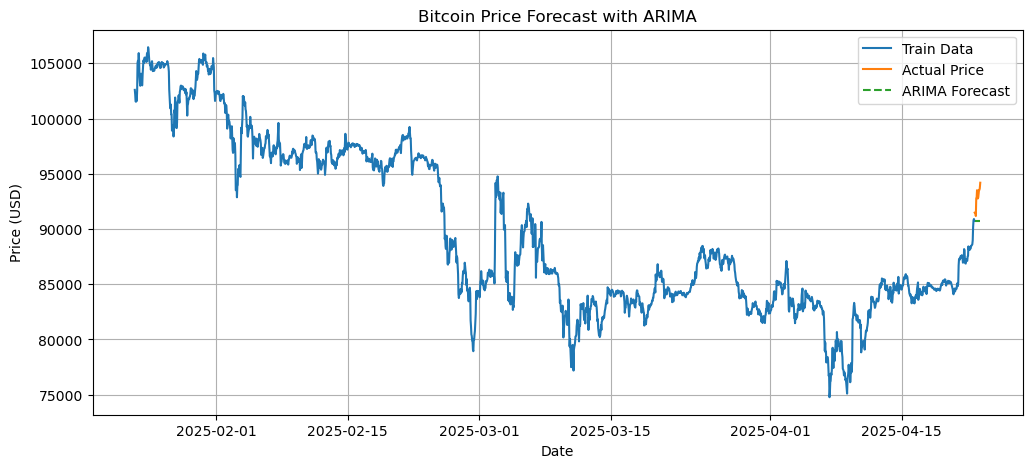

In [8]:
from pmdarima import auto_arima

# Prepare data for ARIMA model
# Import necessary libraries for ARIMA and evaluation
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the data by making a copy of the original dataframe and setting 'ds' as the index for time series analysis
df_arima = df.copy()  # Assuming 'df' is already defined with the required data
df_arima.set_index("ds", inplace=True)

# Initialize the Auto ARIMA model, which will automatically select the best p, d, q parameters
model = auto_arima(df_arima['y'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Split the dataset into training and testing sets (last 15 days are used for testing)
train = df_arima[:-15]  # Use all data except the last 15 days for training
test = df_arima[-15:]   # The last 15 days are used for testing

# Fit the ARIMA model on the training data
model.fit(train)

# Forecast the next 15 days of Bitcoin prices using the trained model
forecast = model.predict(n_periods=15)

# Evaluate the model's accuracy using MAE and RMSE
mae = mean_absolute_error(test['y'], forecast)  # Mean Absolute Error (MAE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast))  # Root Mean Squared Error (RMSE)

# Print the evaluation metrics (MAE and RMSE)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the actual vs. forecasted Bitcoin prices
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['y'], label="Train Data")  # Plot the training data
plt.plot(test.index, test['y'], label="Actual Price")  # Plot the actual test data
plt.plot(test.index, forecast, label="ARIMA Forecast", linestyle='--')  # Plot the forecasted prices
plt.title("Bitcoin Price Forecast with ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
